In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [5]:
zip_path = "/content/bank+marketing.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/bank_data")

In [6]:
inner_zip_path = "/content/bank_data/bank.zip"
with zipfile.ZipFile(inner_zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/bank_data/bank")

In [7]:
print("Files in extracted bank folder:")
for root, dirs, files in os.walk("/content/bank_data/bank"):
    for name in files:
        print(os.path.join(root, name))

Files in extracted bank folder:
/content/bank_data/bank/bank.csv
/content/bank_data/bank/bank-names.txt
/content/bank_data/bank/bank-full.csv


In [8]:
data_path = "/content/bank_data/bank/bank-full.csv"
df = pd.read_csv(data_path, sep=';')

In [9]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nSample Data:\n", df.head())

Shape of dataset: (45211, 17)

Columns:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Sample Data:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unkno

In [10]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [12]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8740462235983634

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



Simplified Tree Accuracy: 0.8876479044564857
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.24      0.34      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043



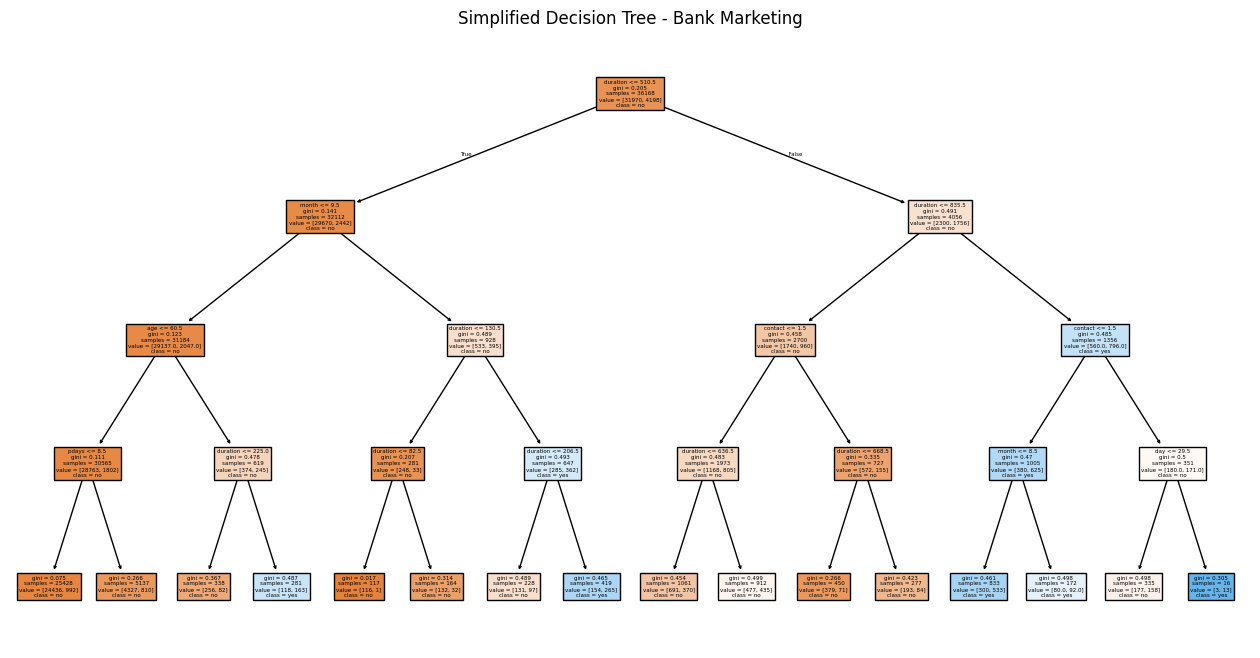

In [16]:
model_simple = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)
print("Simplified Tree Accuracy:", accuracy_score(y_test, y_pred_simple))
print("Classification Report:\n", classification_report(y_test, y_pred_simple))
plt.figure(figsize=(16, 8))
plot_tree(model_simple, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.title("Simplified Decision Tree - Bank Marketing")
plt.show()